# Plots

In [1]:
from plotnine import (
    ggplot,
    aes,
    geom_point,
    geom_boxplot,
    geom_bar,
    geom_smooth,
    facet_wrap,
    labs,
    theme,
    theme_538,
    element_rect,
    element_text,
)
from plotnine import *
from plotnine.composition import plot_spacer
from plotnine.data import mtcars

In [2]:
p1 = ggplot(mtcars, aes("disp", "qsec")) + geom_smooth()
p2 = ggplot(mtcars, aes("wt", "mpg")) + geom_point()
p3 = ggplot(mtcars, aes("factor(gear)", "mpg")) + geom_boxplot()
p4 = ggplot(mtcars, aes("carb")) + geom_bar()

## The Arithmetic

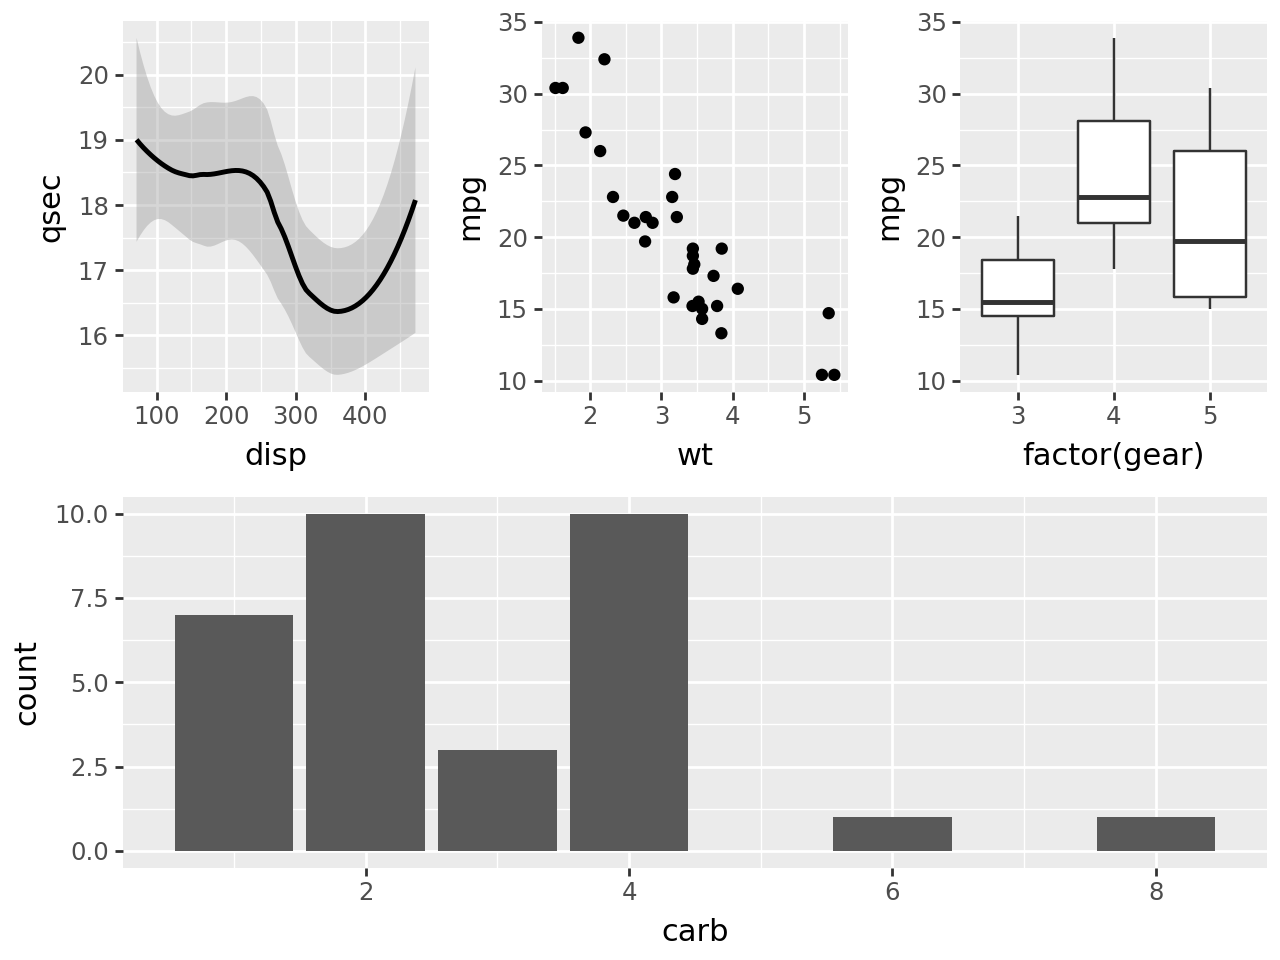

In [3]:
(p1 | p2 | p3) / p4

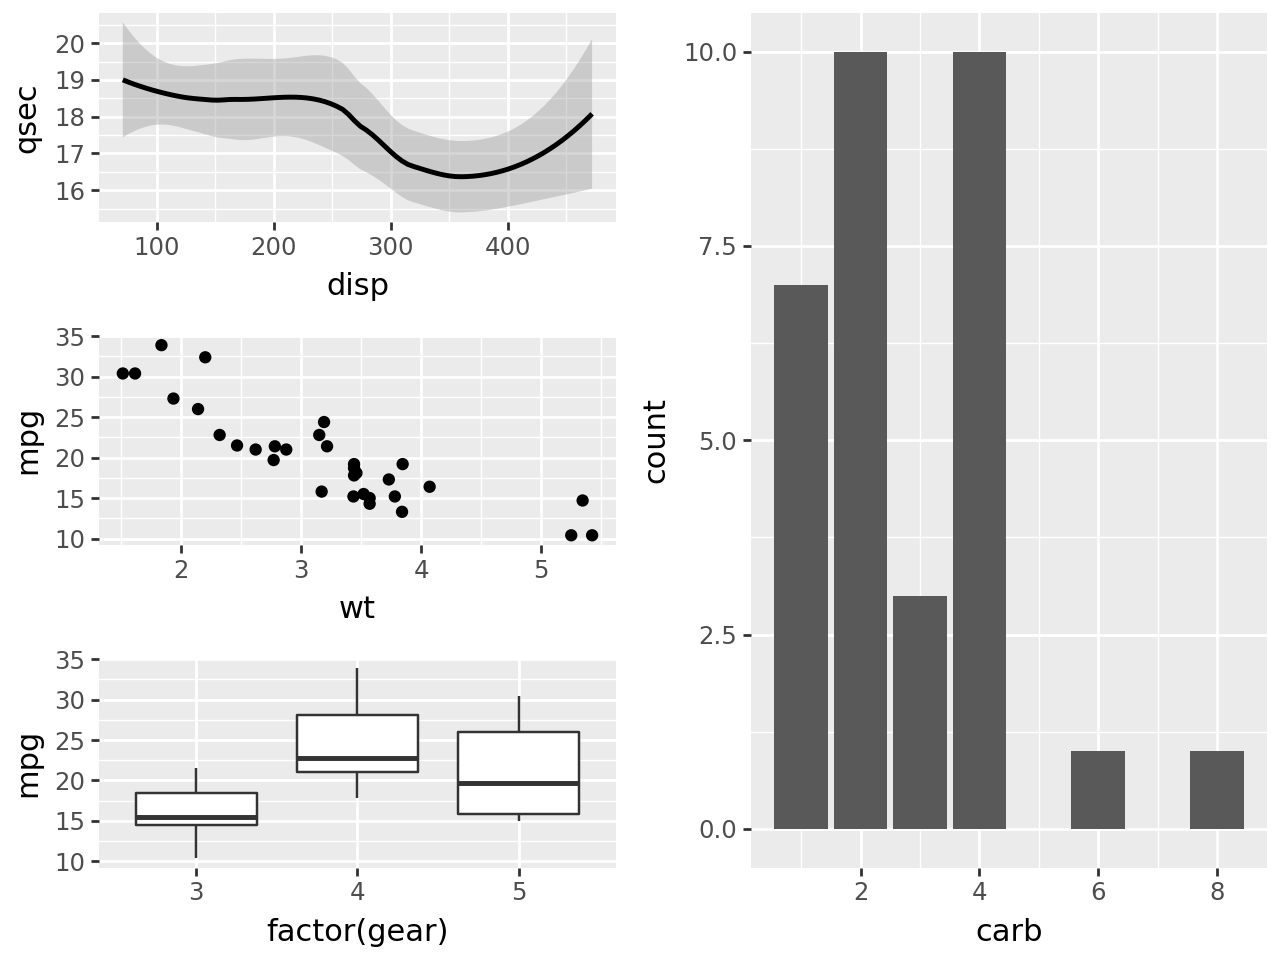

In [4]:
(p1 / p2 / p3) | p4

The grouping of the plots is determined by the precedence of the
operators which means these two:

``` python
p1 / p2 / p3 | p4
(p1 / p2 / p3) | p4
```

are equivalent.

The space allocated within the overall composition is determined by the
groups. e.g. Below, the *panel* in `p1` has the same height as the
*panels* of `p2` and `p3` combined.

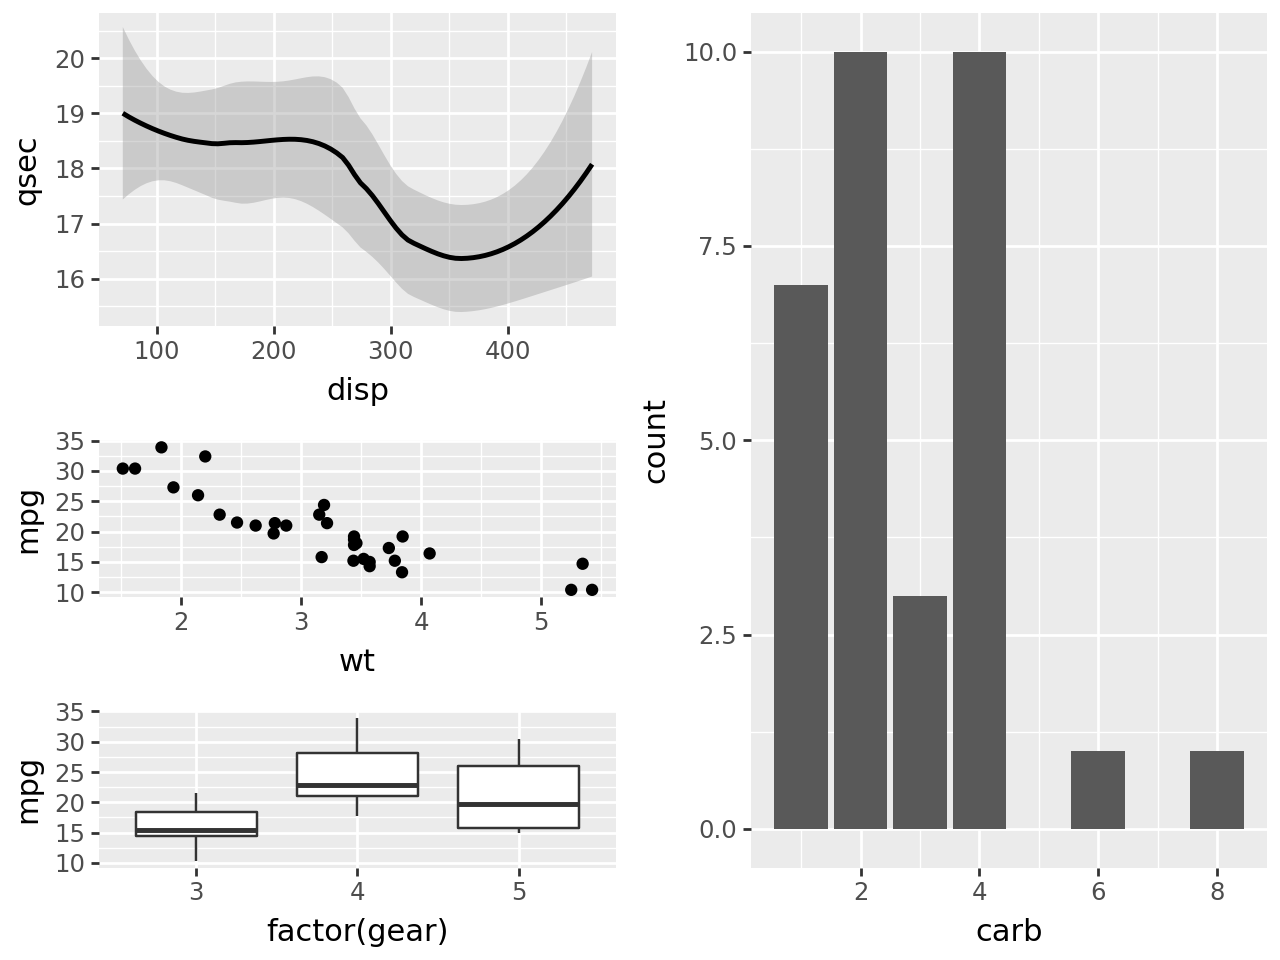

In [5]:
(p1 / (p2 / p3)) | p4

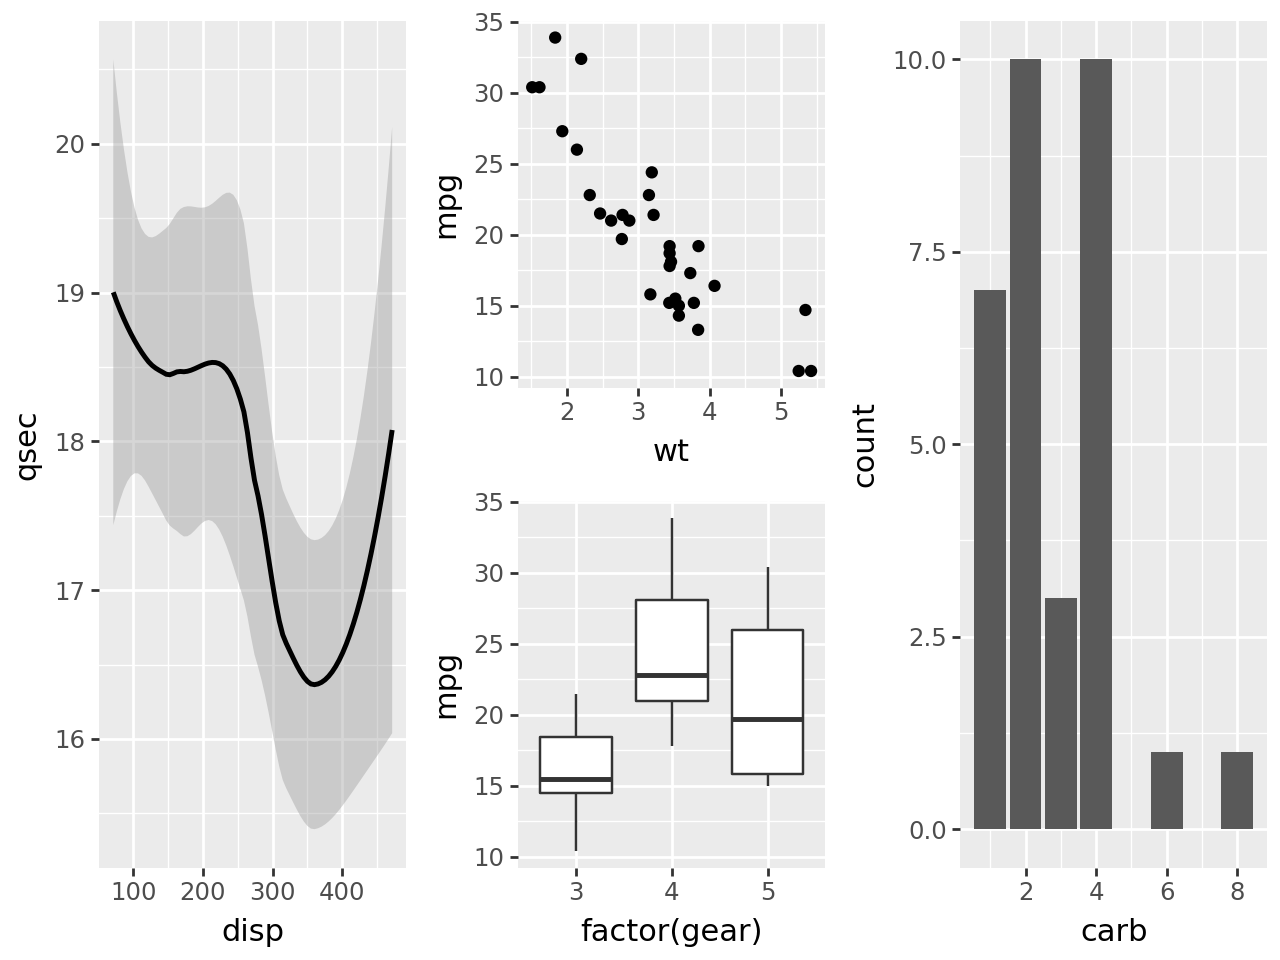

In [6]:
p1 | (p2 / p3) | p4

For a 2x wider panel on the left, we group the items on the right.

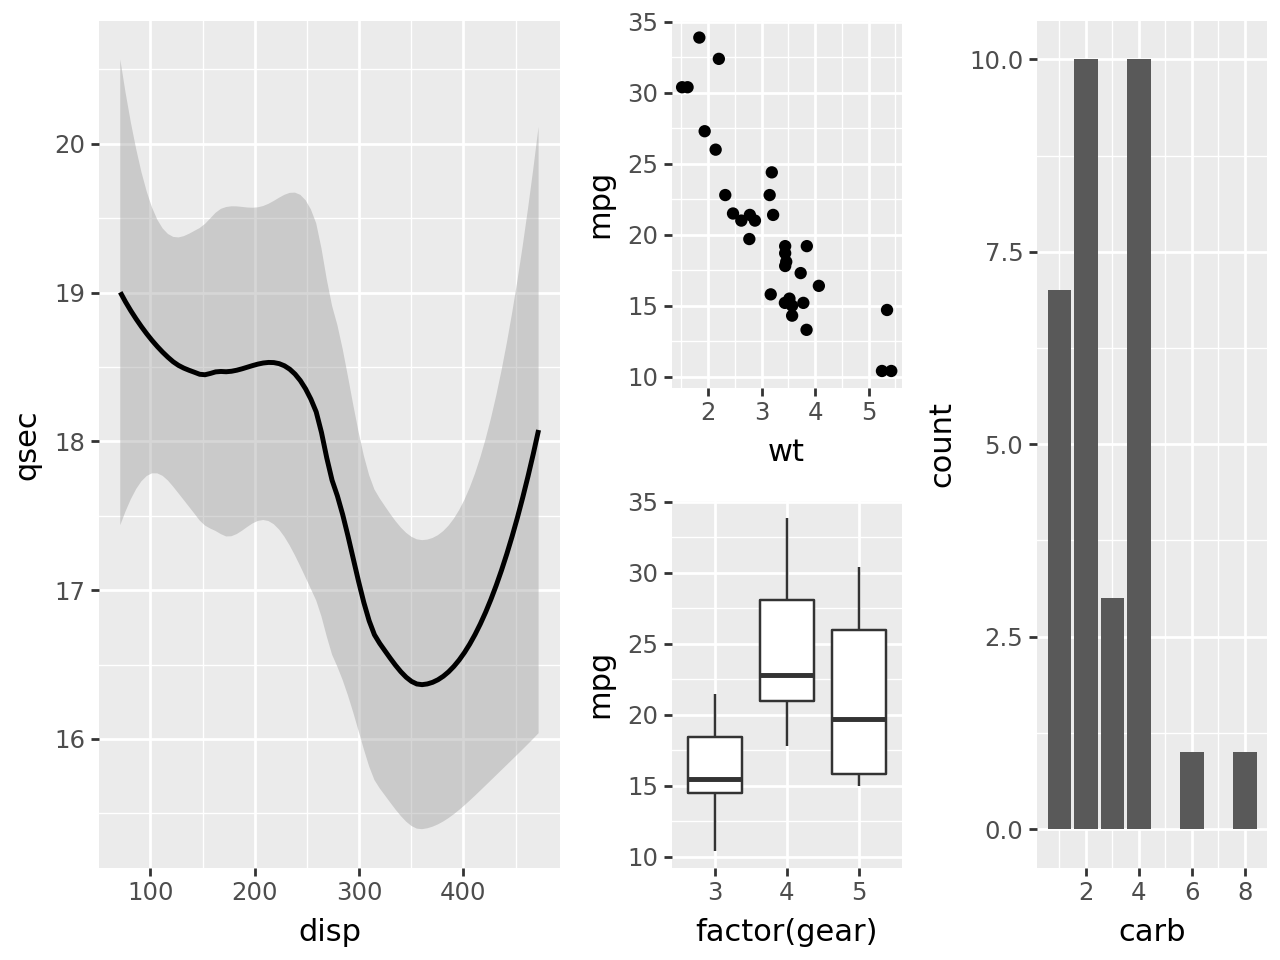

In [7]:
p1 | ((p2 / p3) | p4)

For a 2x wider panel on the right, we put together the left and right at
the same nesting level.

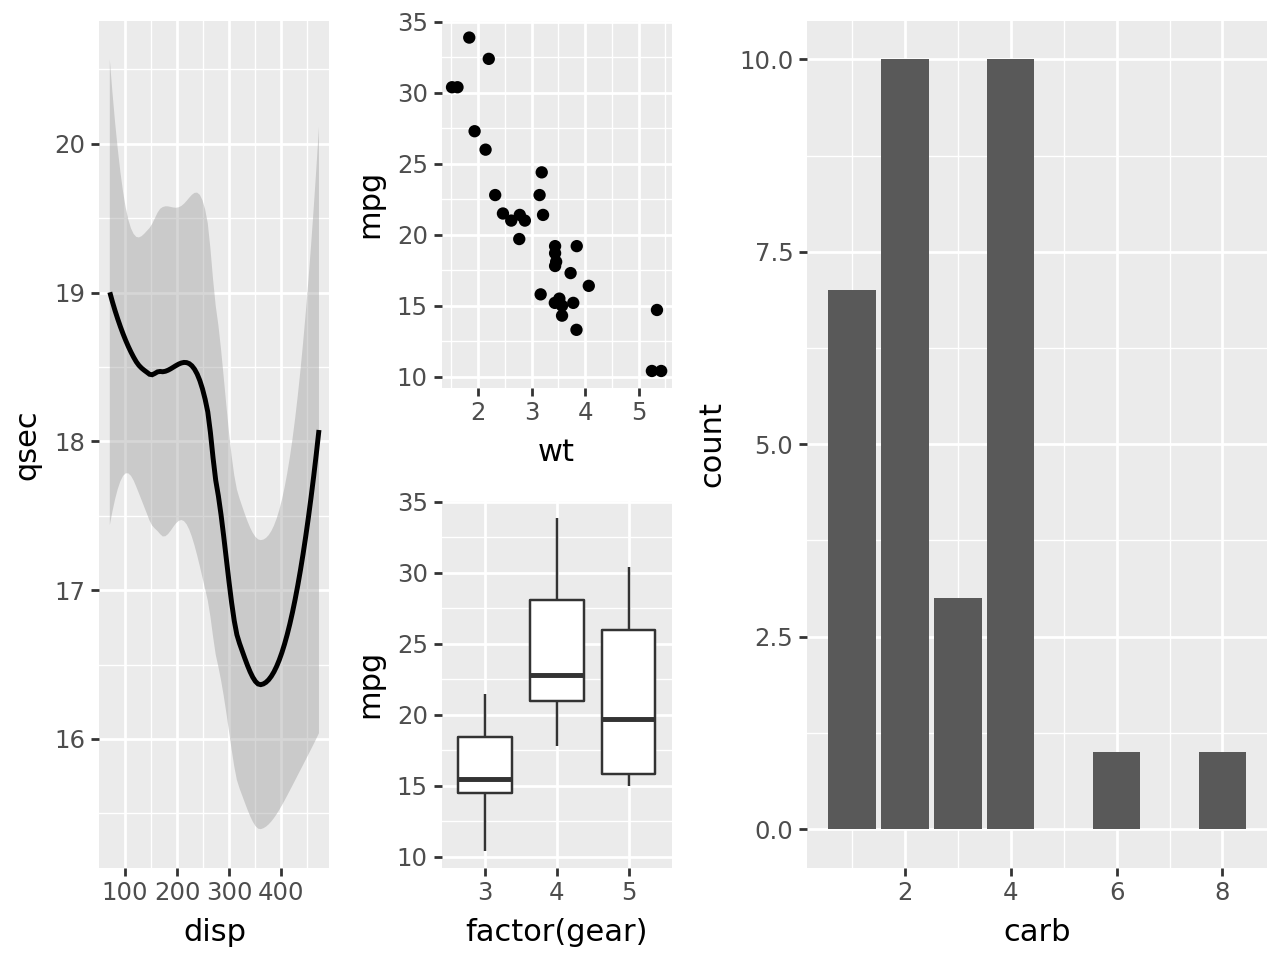

In [8]:
(p1 | (p2 / p3)) - p4

## Modifying the composition

### Add to the last plot in the composition

When an object *that is not a plot or composition* is added (`+`) to the
composition, it is added (`+`) to the last plot in the composition.

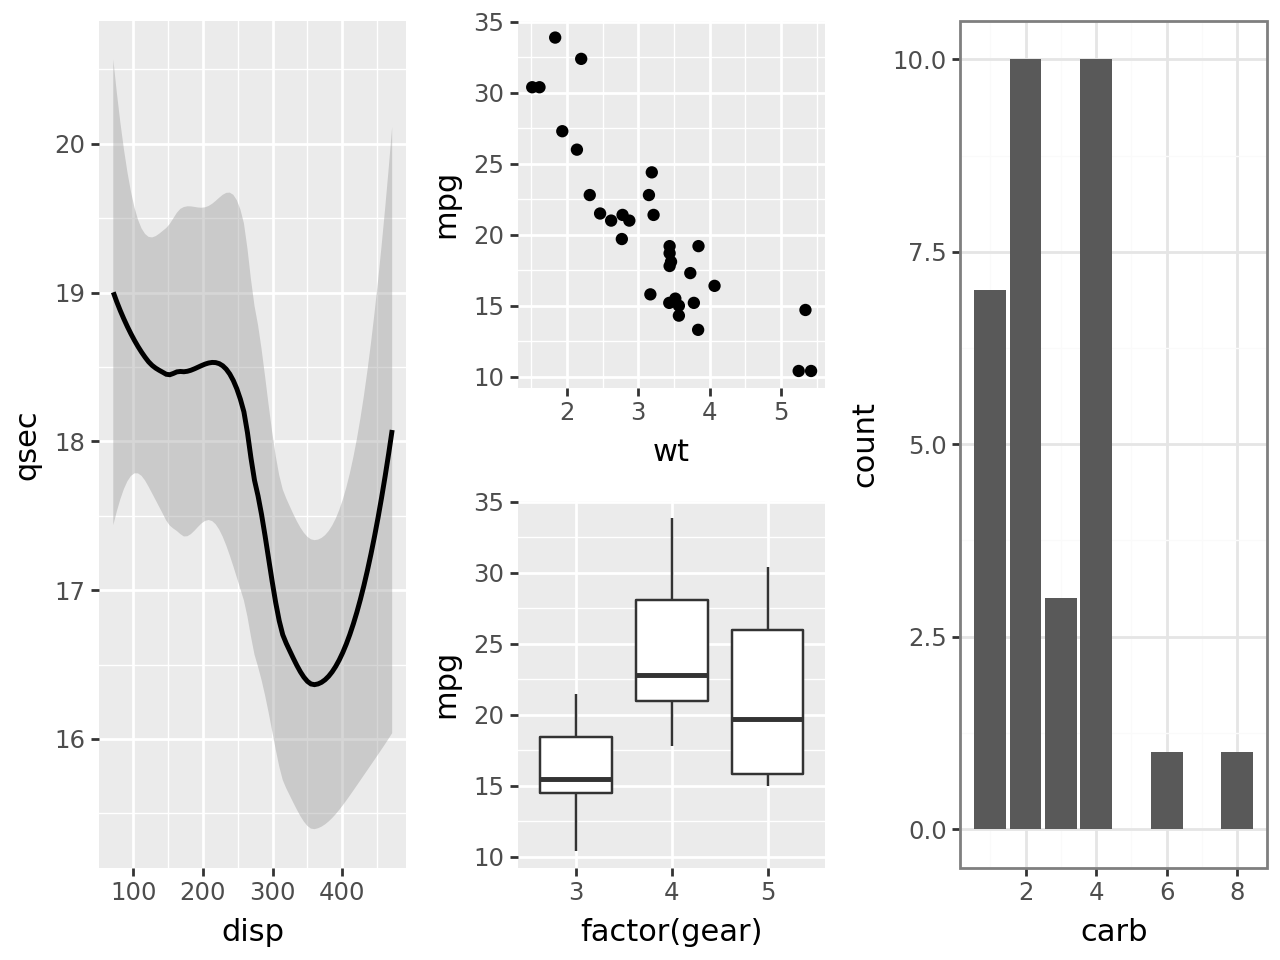

In [9]:
composition = (p1 | (p2 / p3) | p4)
composition + theme_bw()

The `dpi` and `figure_size` of the composition are taken from the last
plot, so we can add to the composition to change them.

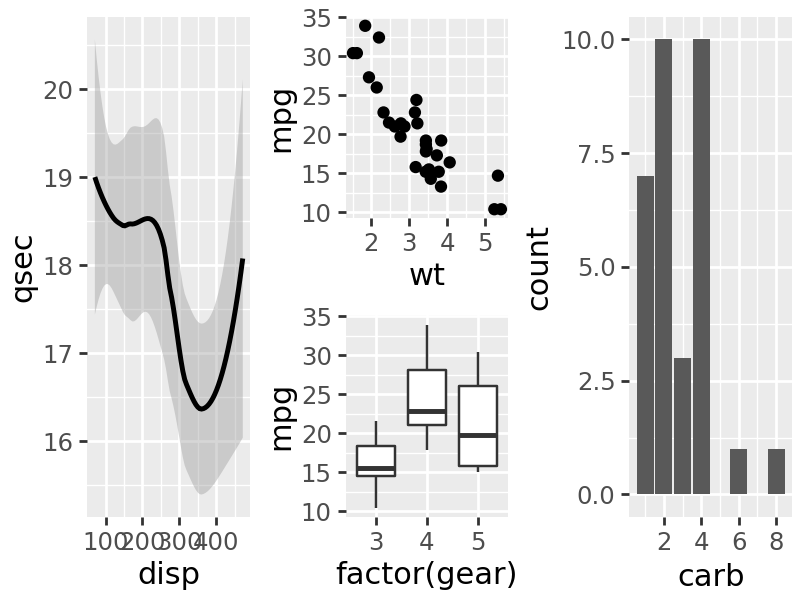

In [10]:
composition + theme(figure_size=(4, 3))

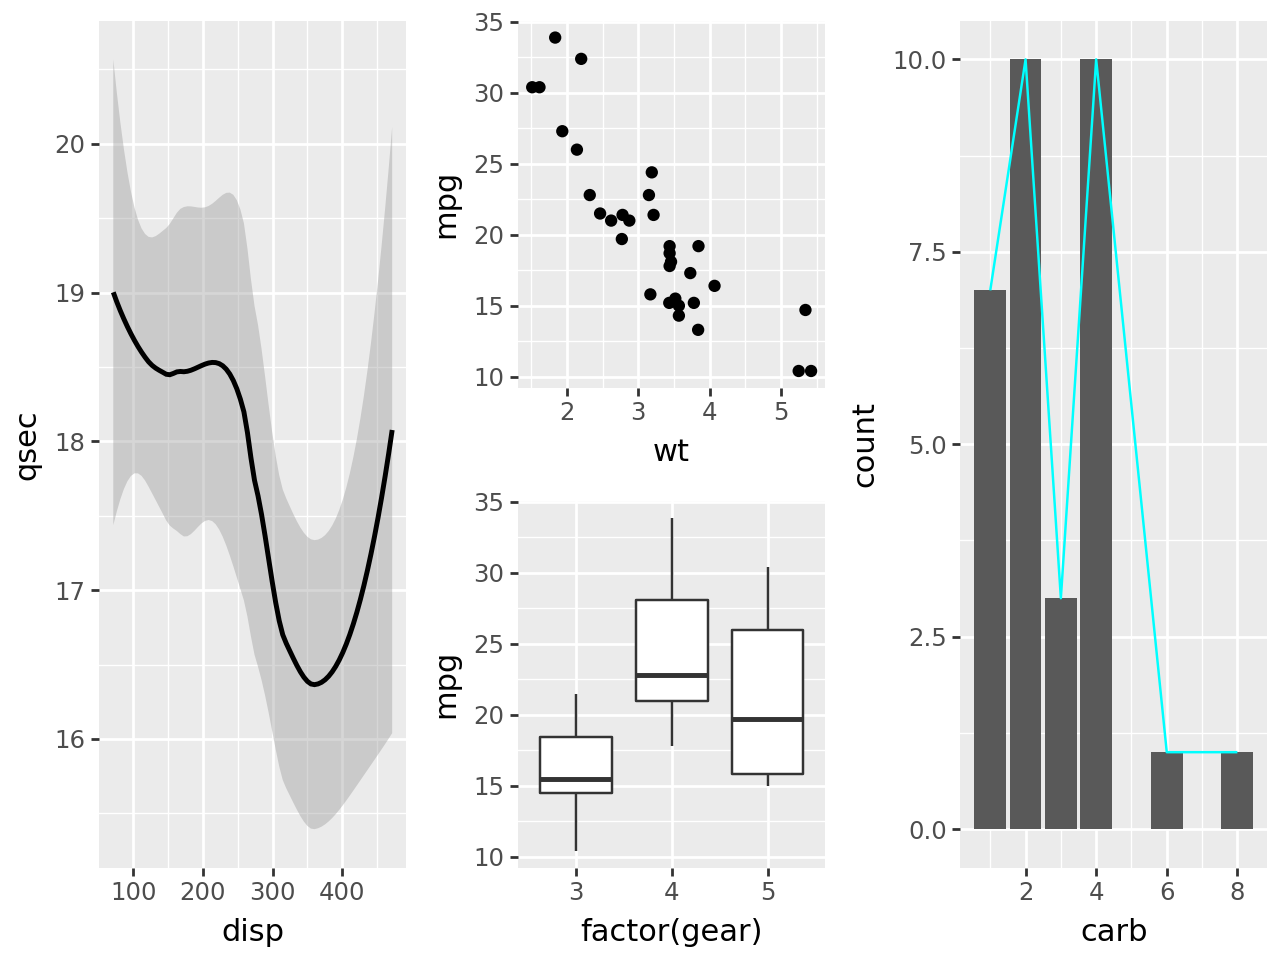

In [11]:
composition + geom_line(aes(y=after_stat("count")), stat="count", color="cyan")

### Add to plots at the top level of the composition

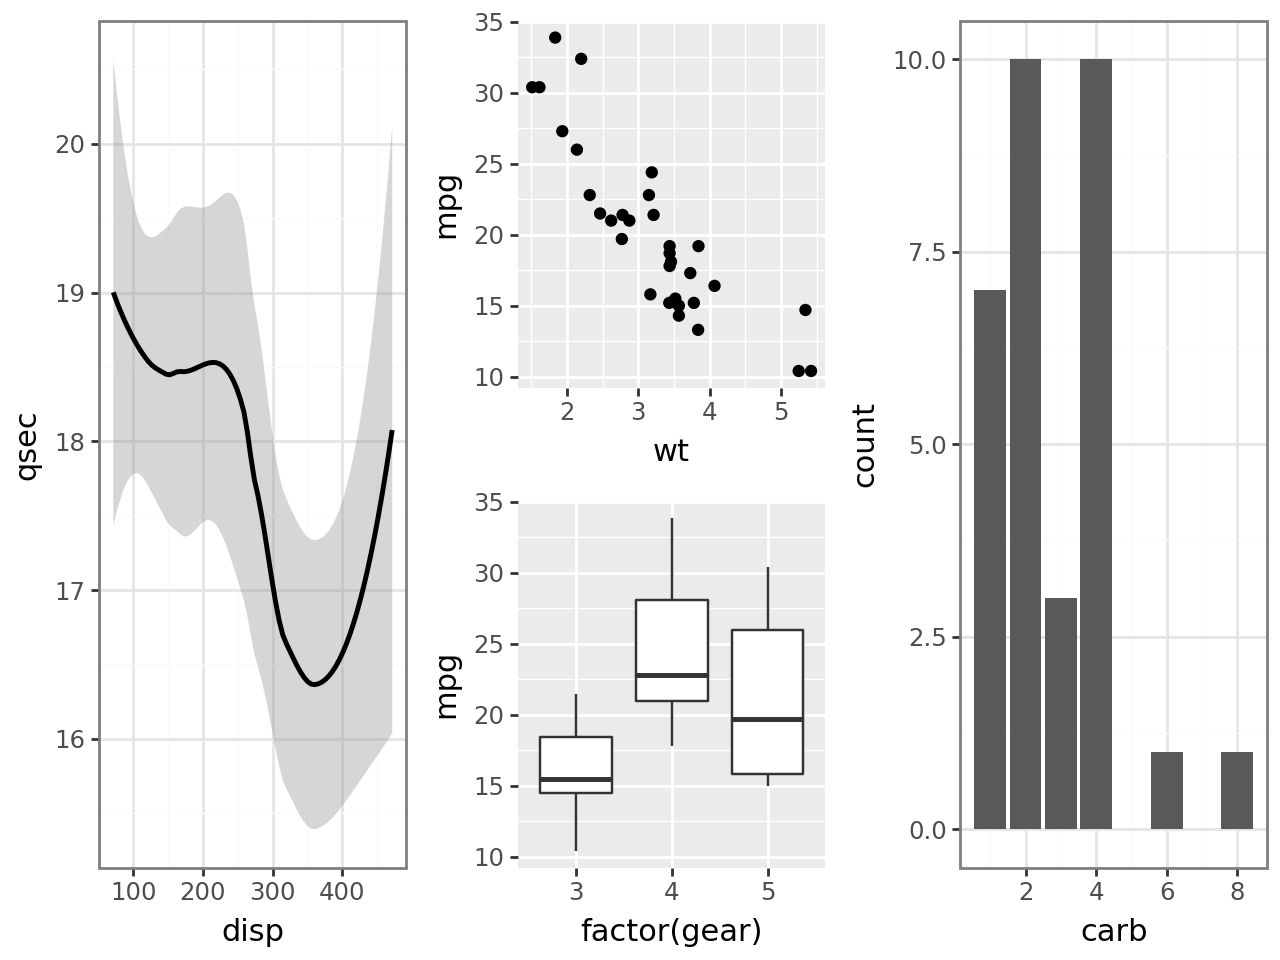

In [12]:
composition * theme_bw()

### Add to all plots in the composition

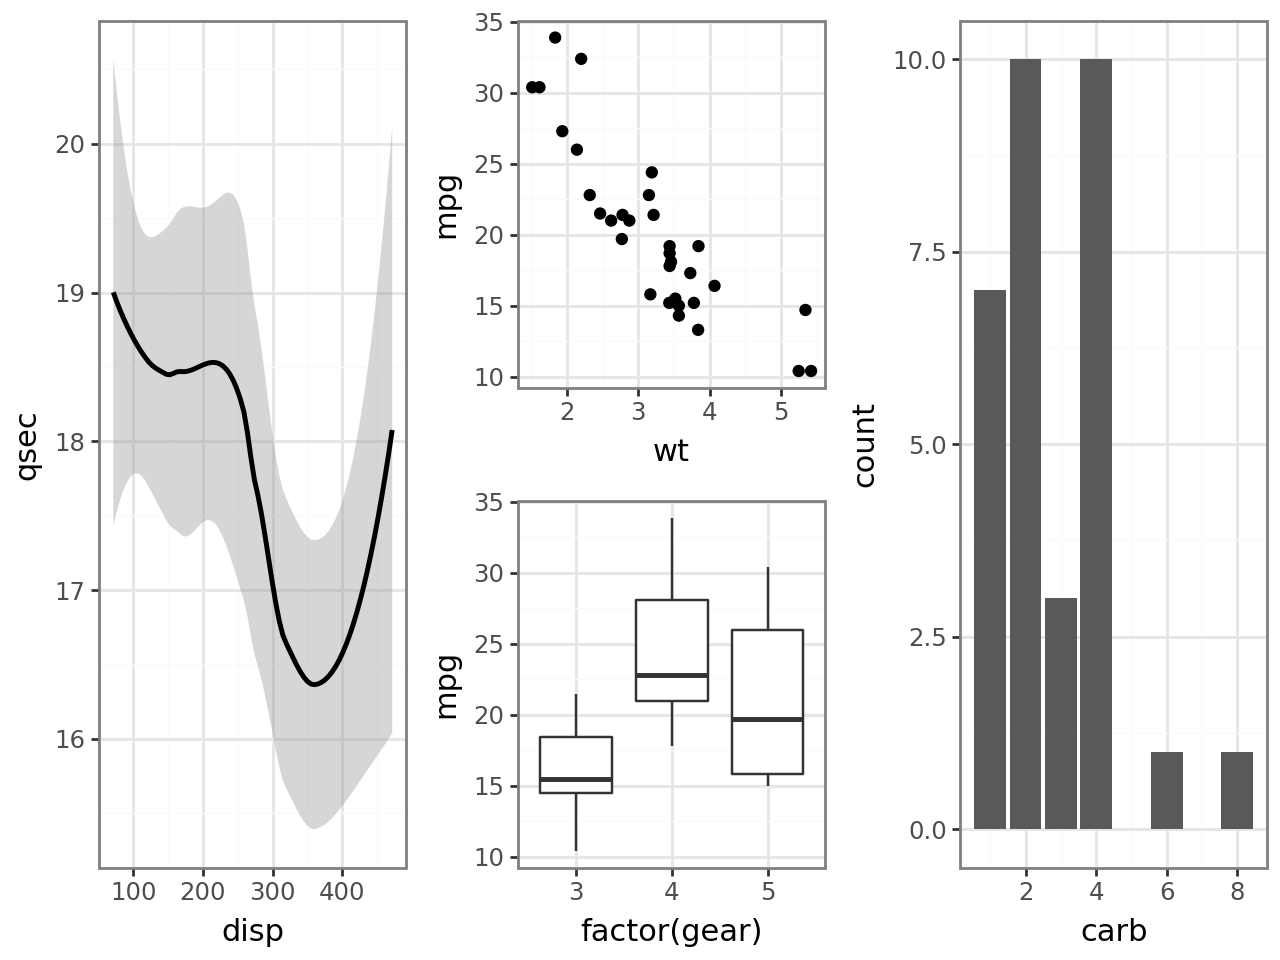

In [13]:
composition & theme_bw()

### Adding space to the composition

You can create space within the composition by adding a `plot_spacer` or
by adjusting `plot_margin`.

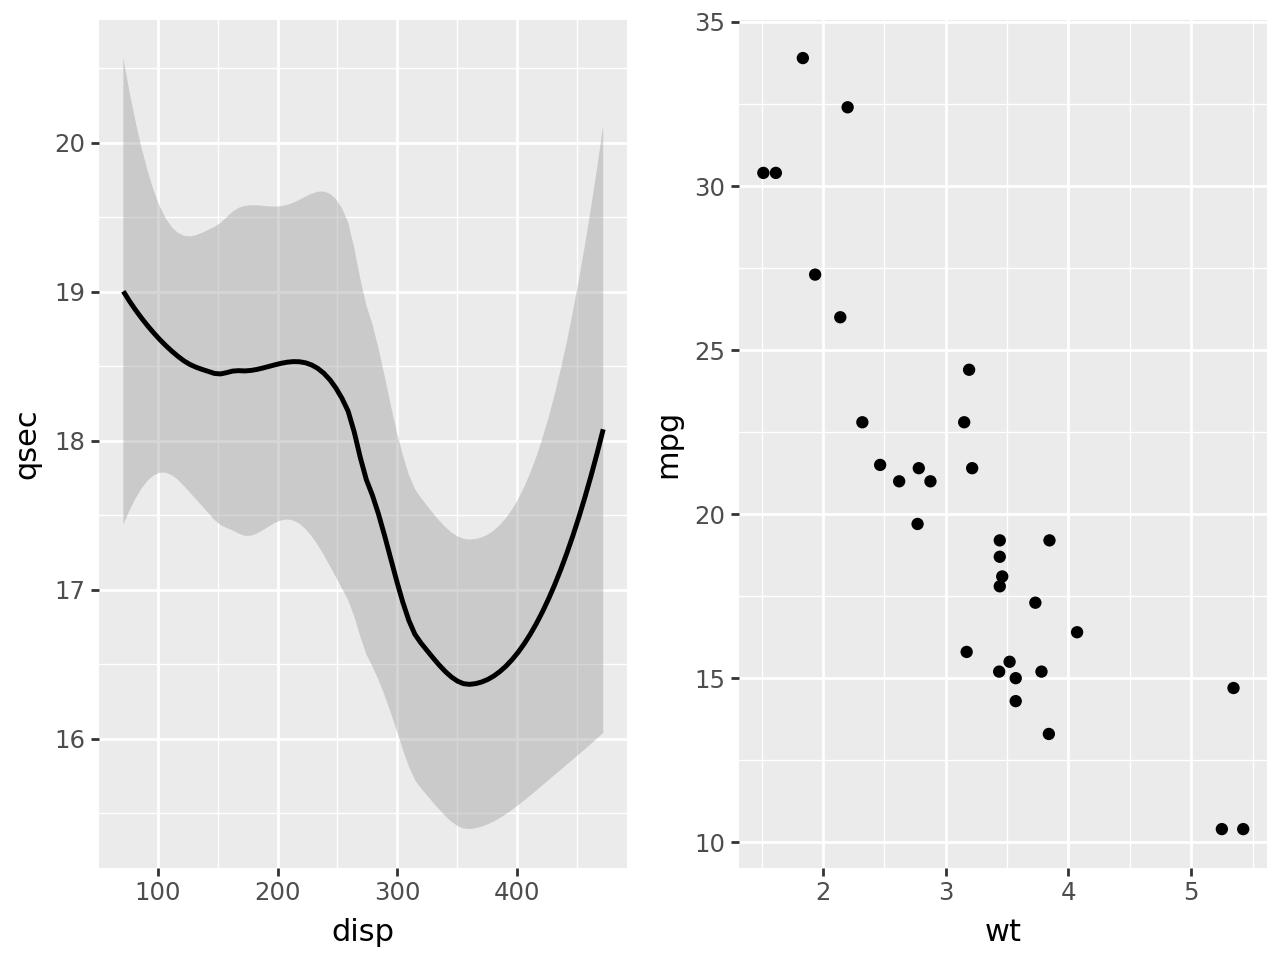

In [14]:
p1 | p2

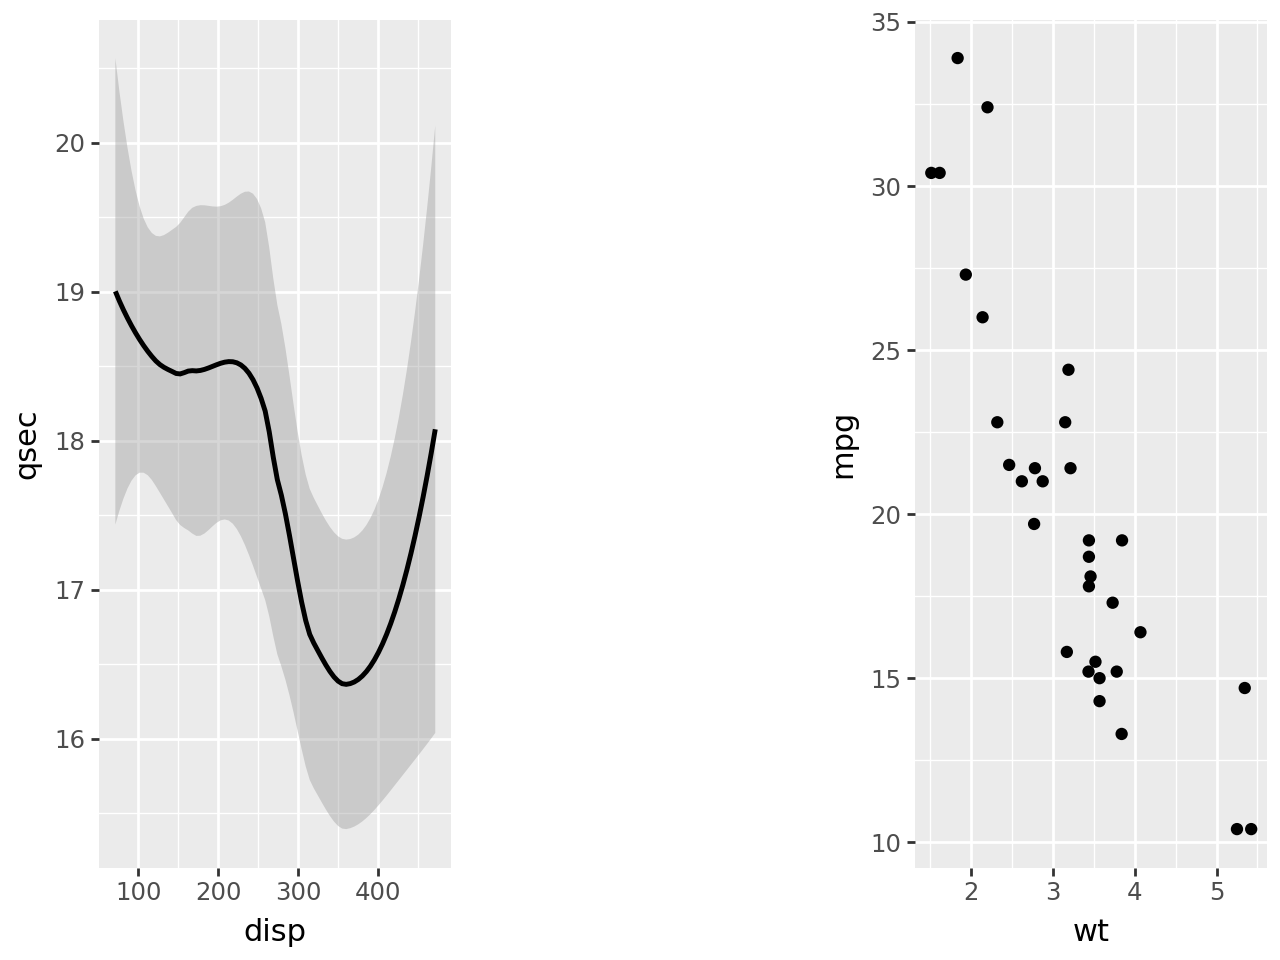

In [15]:
p1 | plot_spacer() | p2

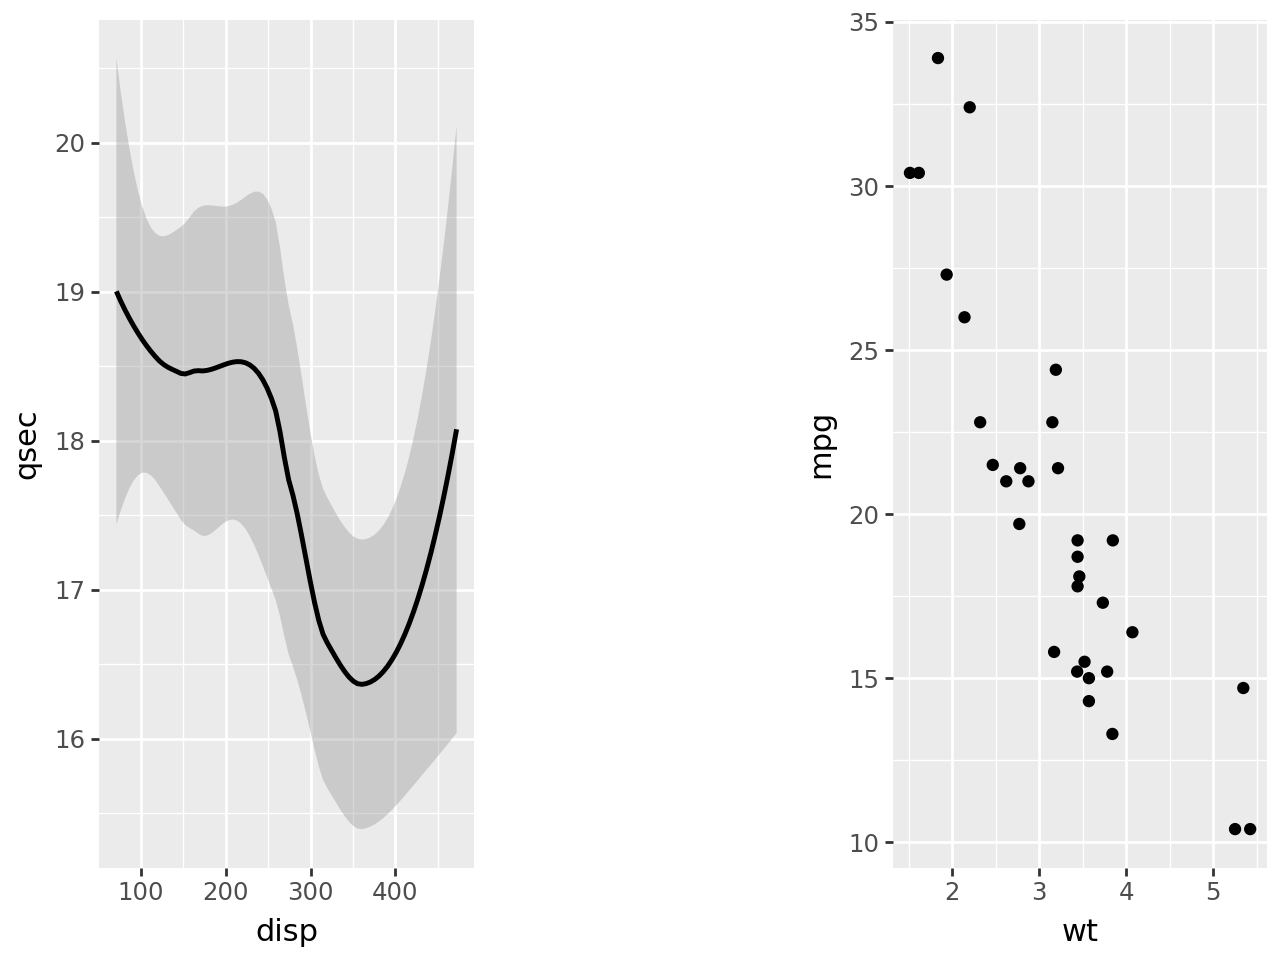

In [16]:
p1 | (p2 + theme(plot_margin_left=.25))

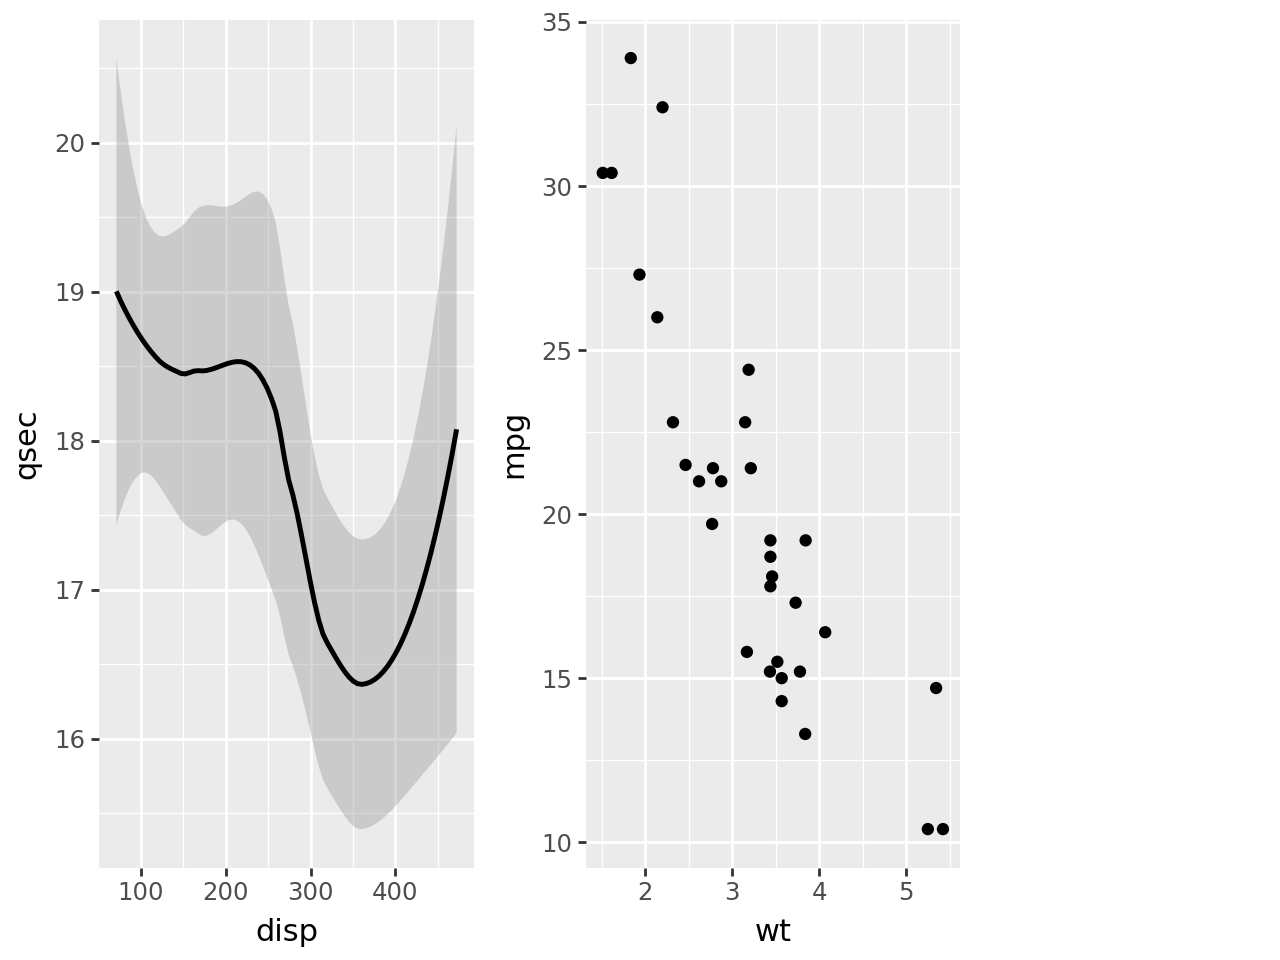

In [17]:
p1 | (p2 + theme(plot_margin_right=.25))

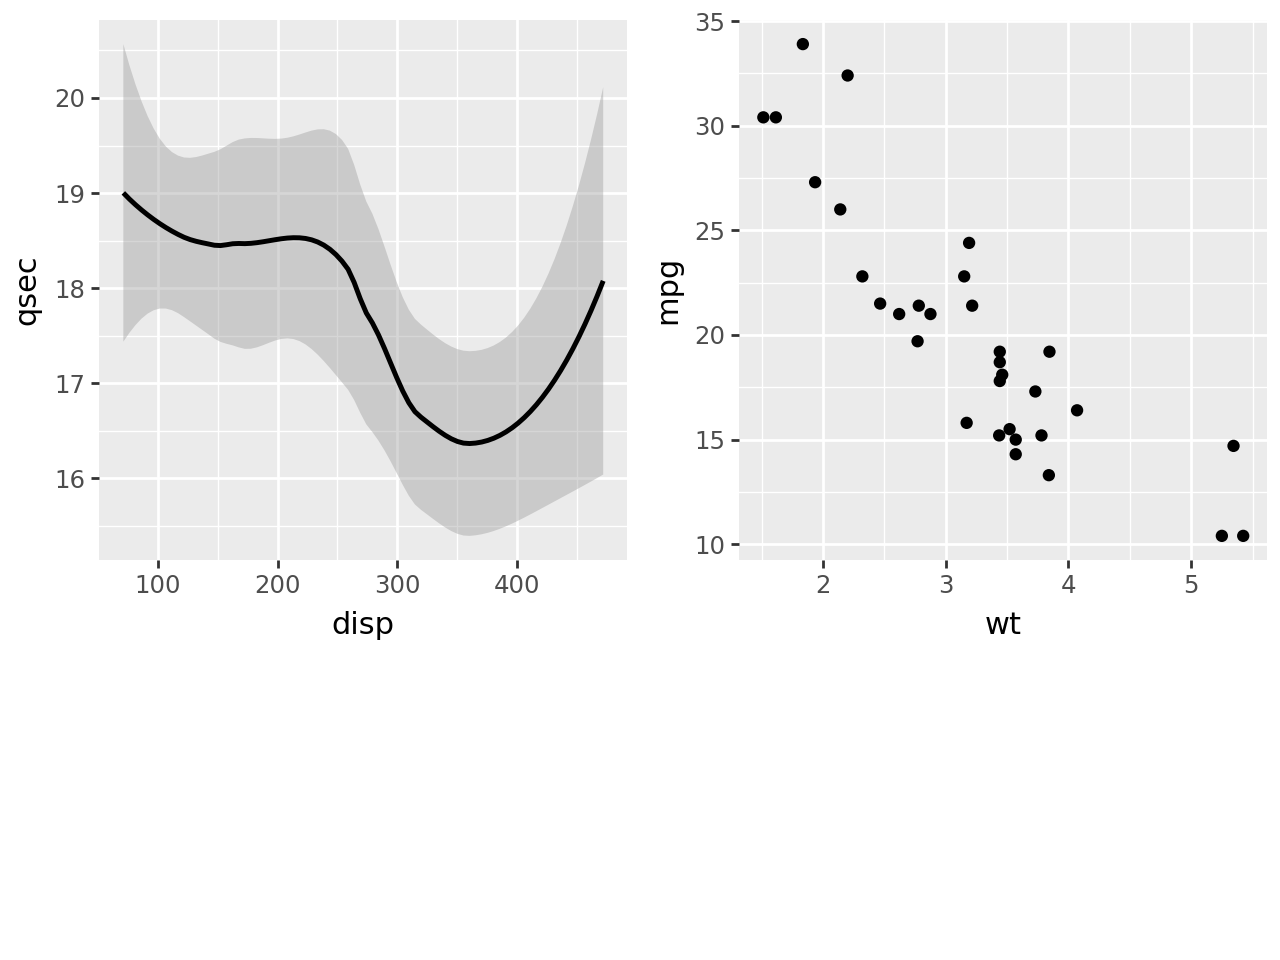

In [18]:
p1 | (p2 + theme(plot_margin_bottom=.25))

While the margin is added to `p2`, the height of `p1` is adjusted so
that the panels align.

#### How space is allocated

For any composition group, the space is allocated such that the edges of
the panels align along one dimension, and the sizes are equal along the
other dimension. For example, when a plot has a legend, it is allocated
more space so that its panel has the same size as the adjacent panel.

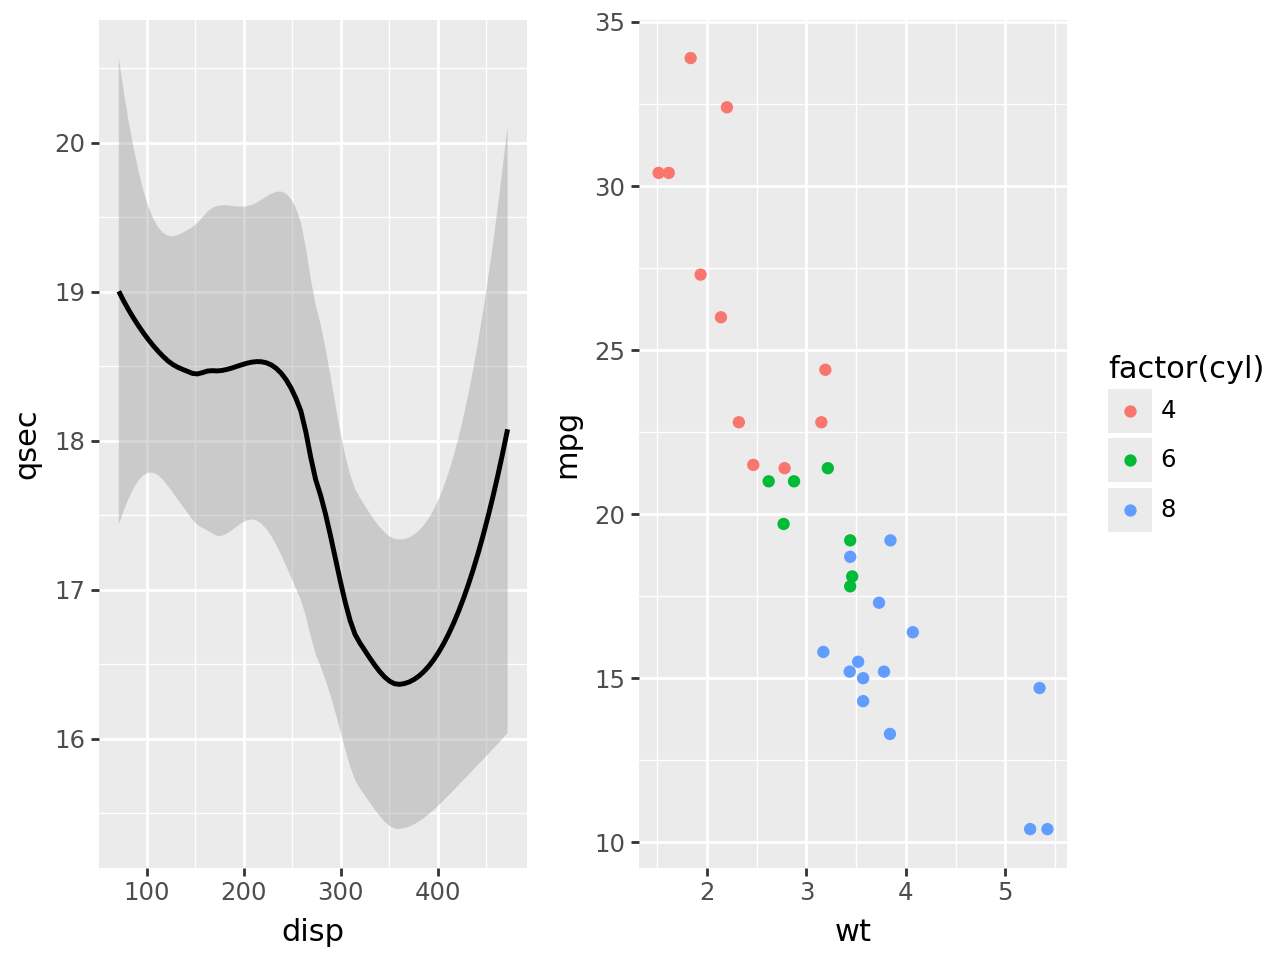

In [19]:
p1 | p2 + aes(color="factor(cyl)")

Making the plot backgrounds visible reveals the size of each plot.

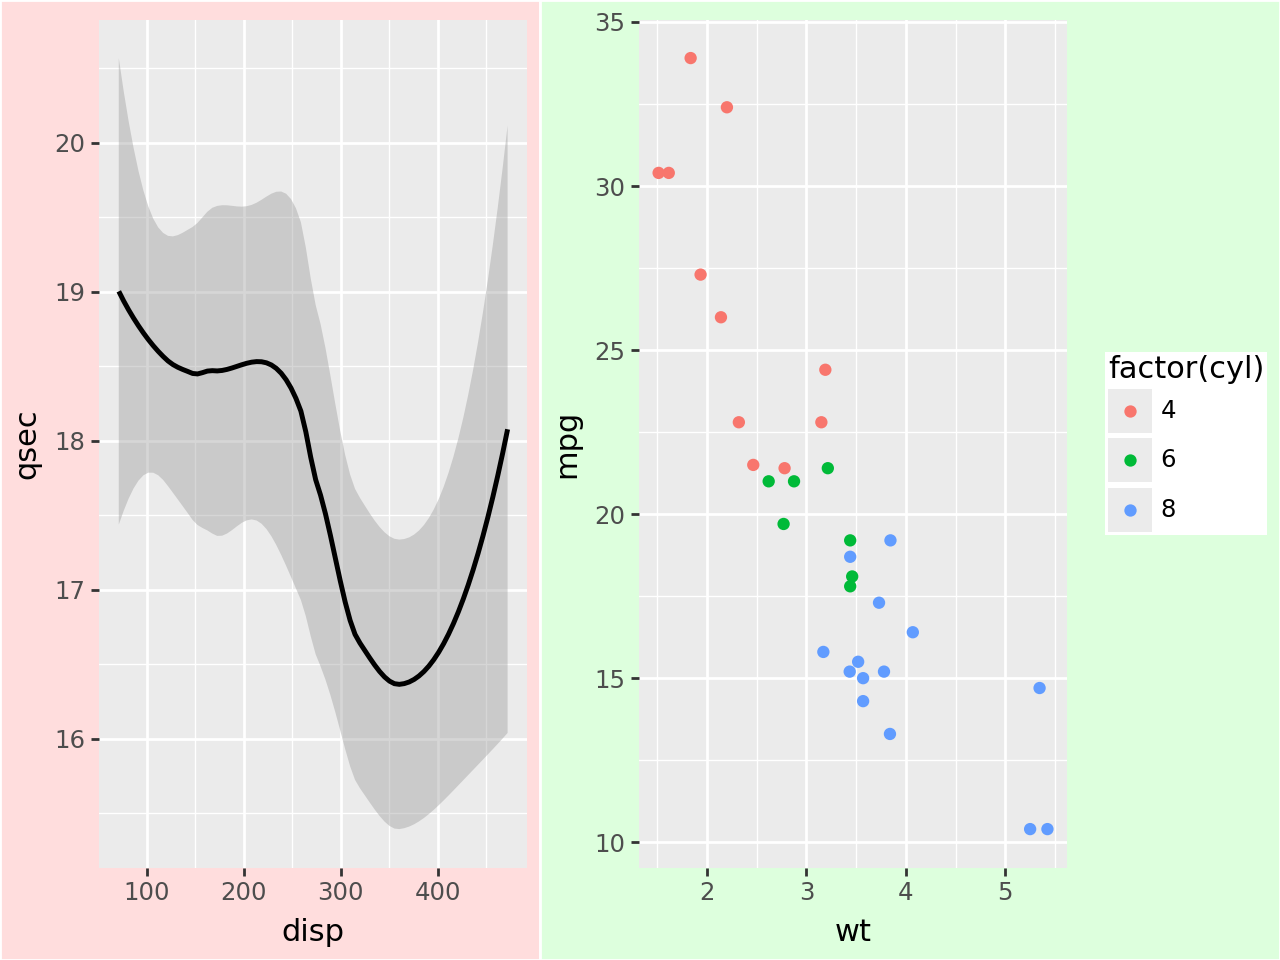

In [20]:
brown_bg = theme(plot_background=element_rect(fill="#FF000022"))
cyan_bg = theme(plot_background=element_rect(fill="#00FF0022"))

(p1 + brown_bg) | (p2 + aes(color="factor(cyl)") + cyan_bg)

Facetted plots are treated as if all the panels were one.

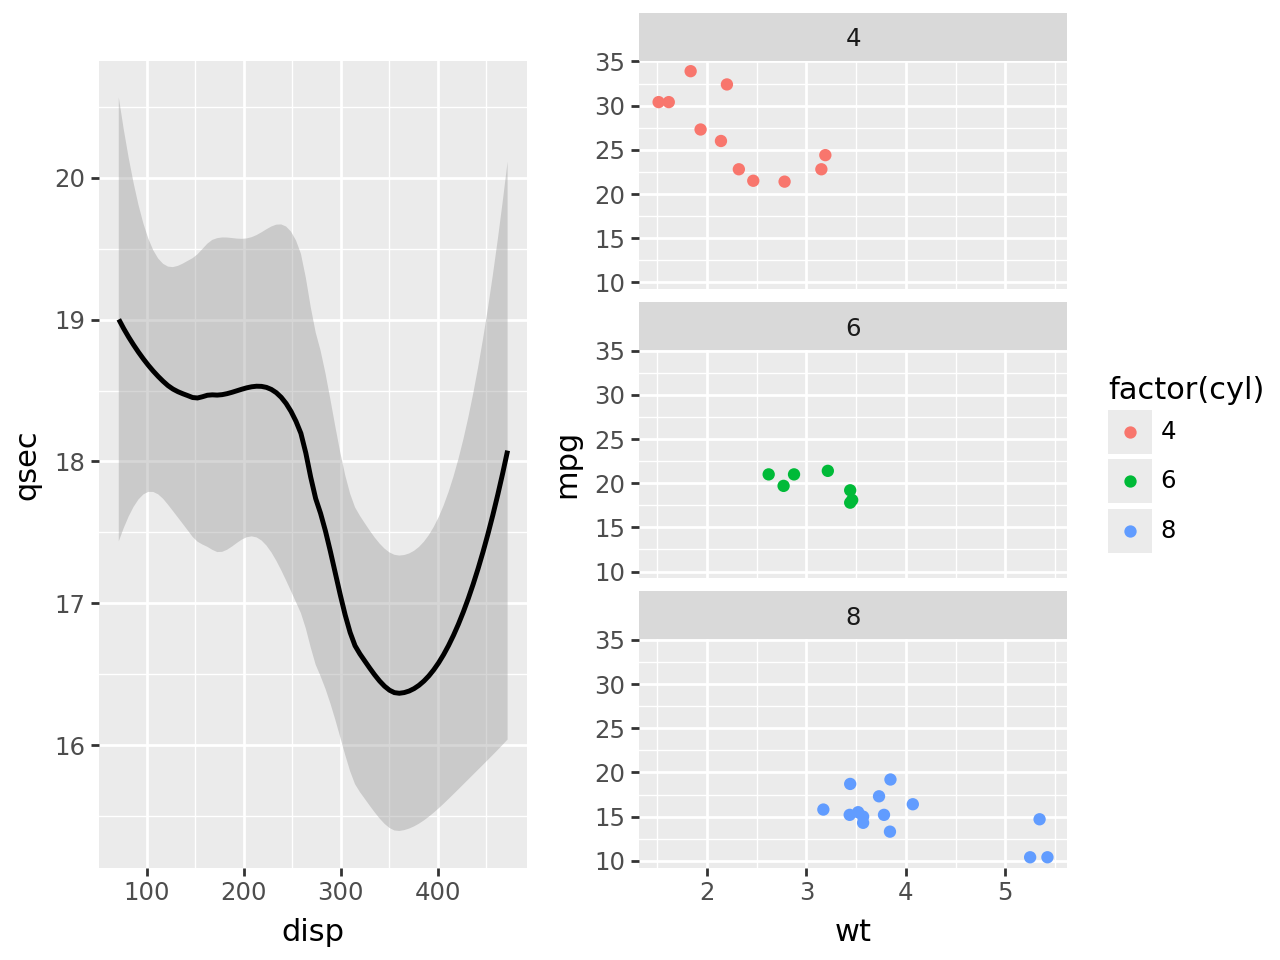

In [21]:
p1 | (p2 + aes(color="factor(cyl)") + facet_wrap("cyl", ncol=1))

And the space between the facet panels counts towards the panel area of
the plot.

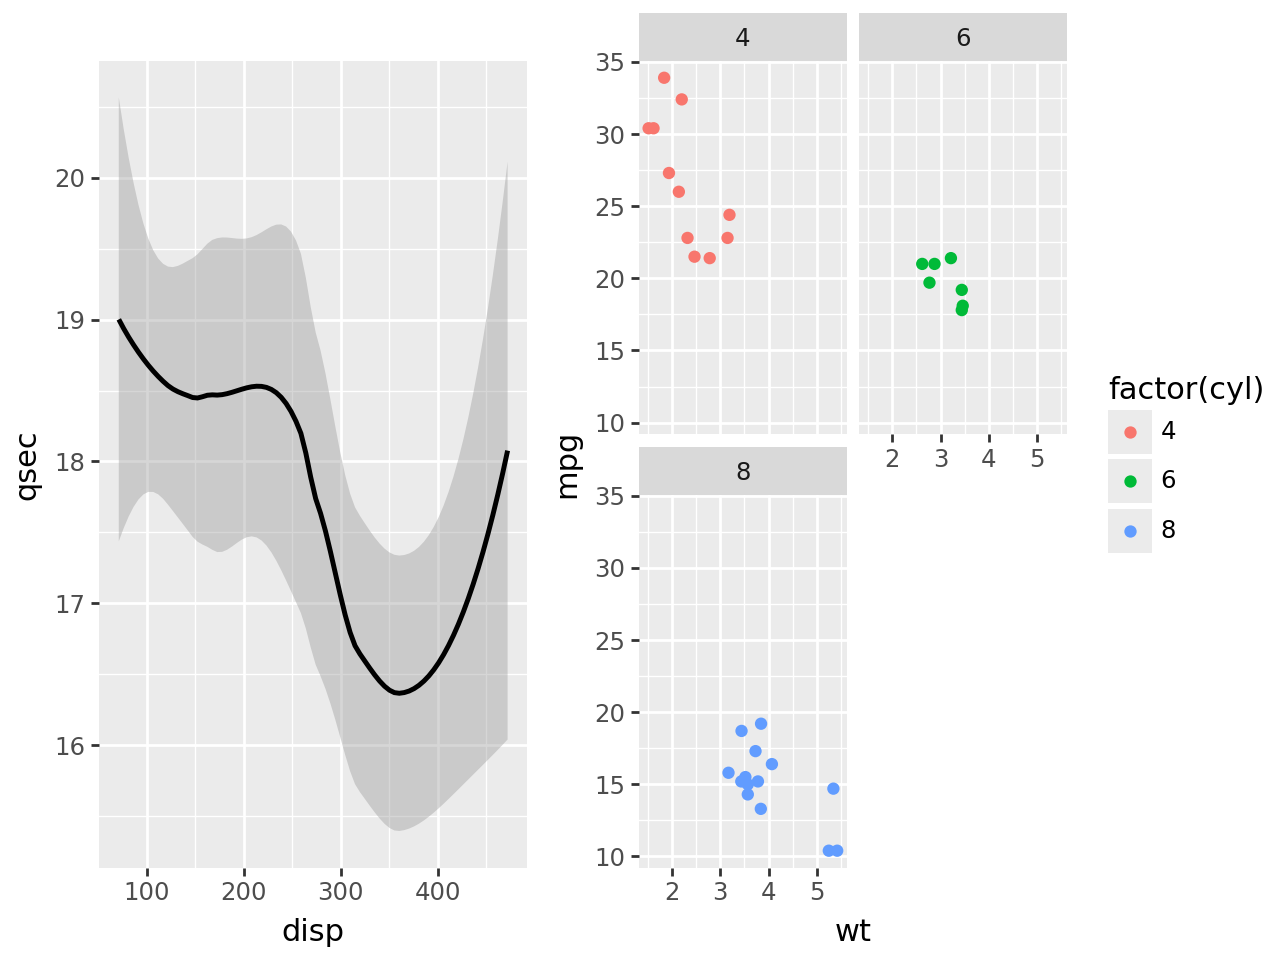

In [22]:
p1 | (p2 + aes(color="factor(cyl)") + facet_wrap("cyl", ncol=2))

## Tagging Plots

Tags are an essential part of plot compositions and the by default the
are placed in the top-left margin of each plot.

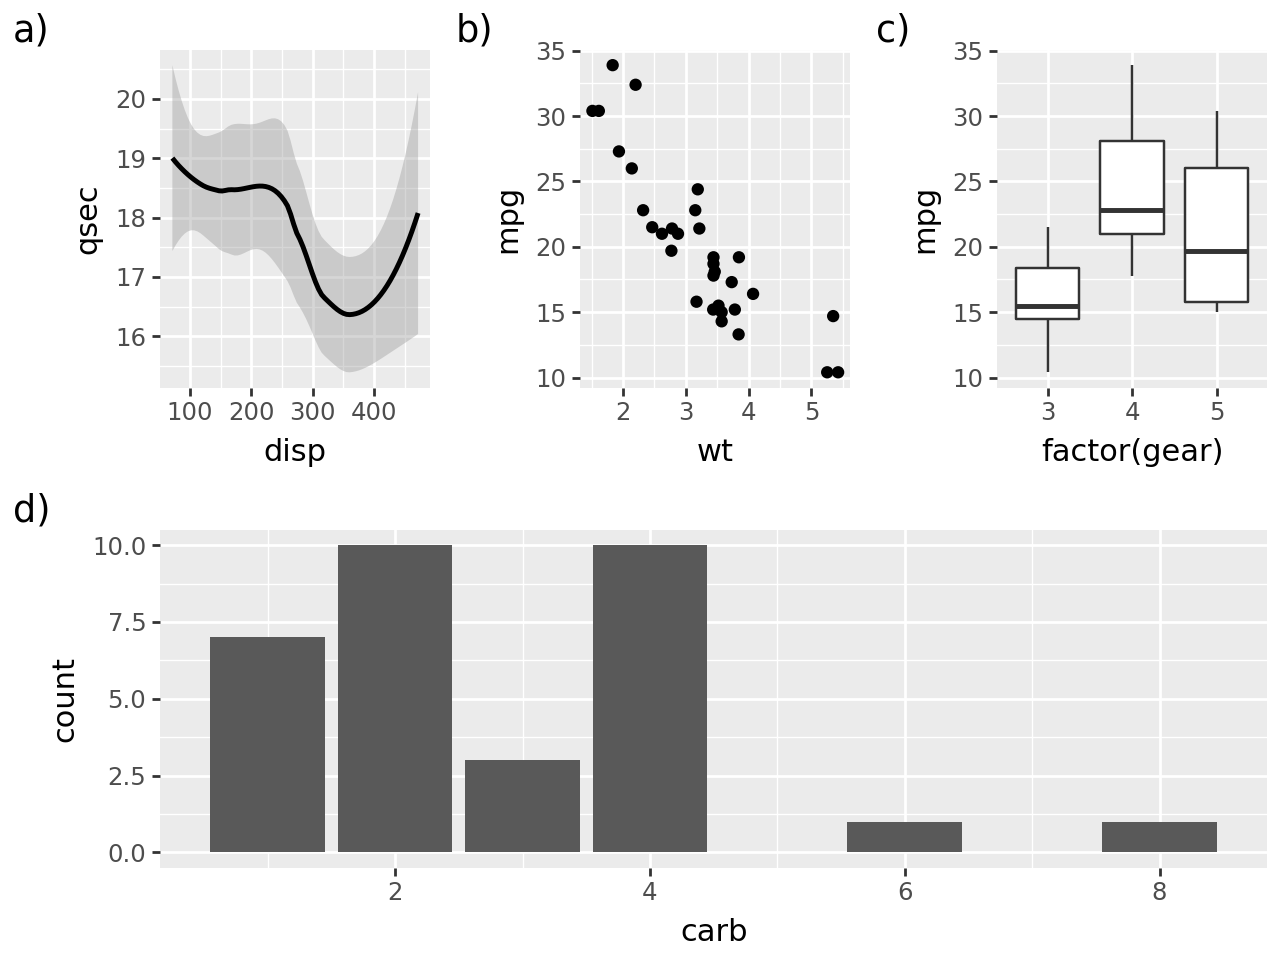

In [23]:
p1_a = p1 + labs(tag="a)")
p2_b = p2 + labs(tag="b)")
p3_c = p3 + labs(tag="c)")
p4_d = p4 + labs(tag="d)")

(p1_a | p2_b | p3_c) / p4_d

The position of each tag can be changed.

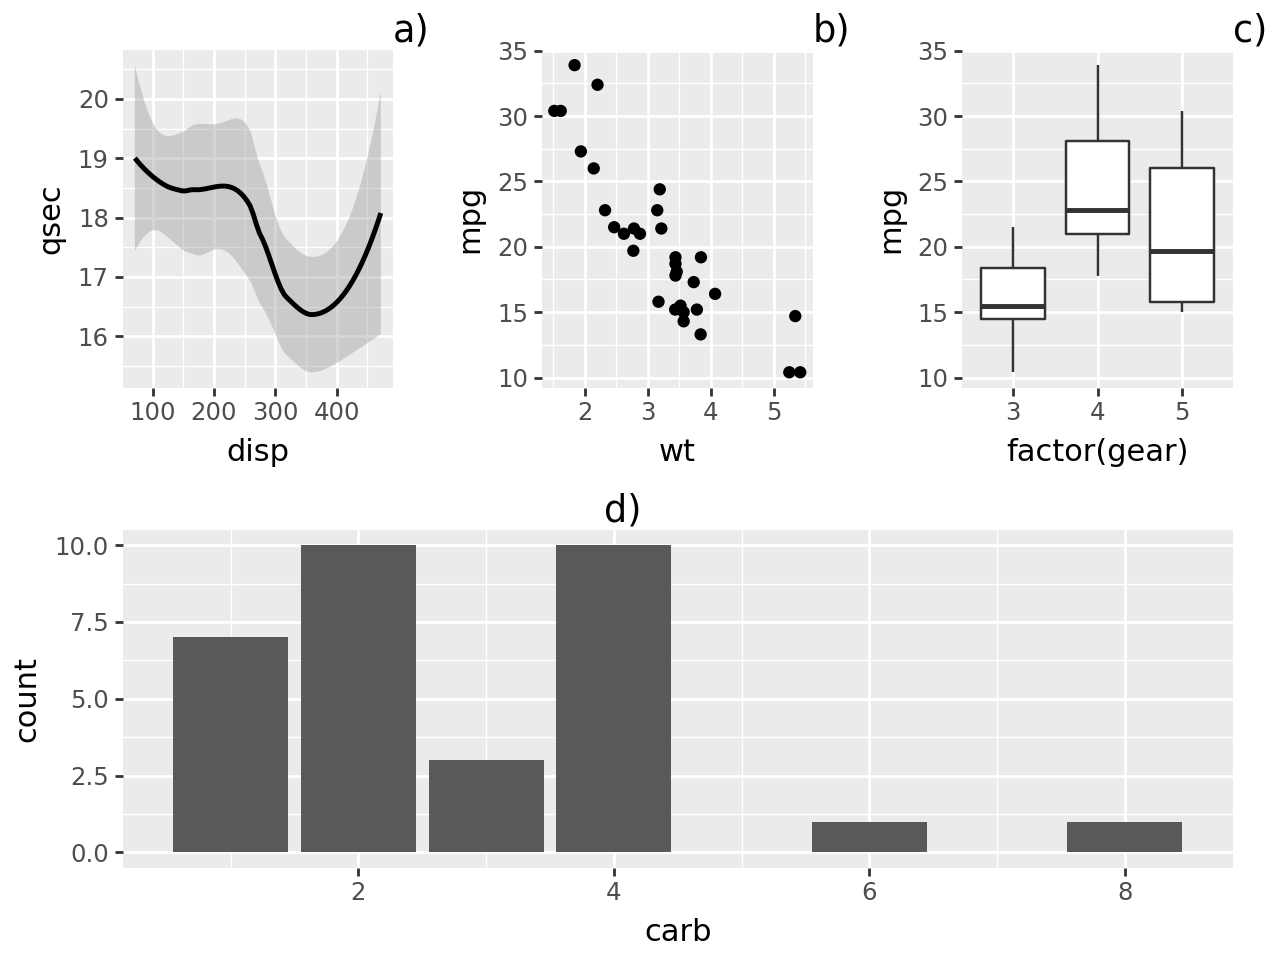

In [24]:
top_right = theme(plot_tag_position="topright")
top = theme(plot_tag_position="top")

p1_a = p1 + labs(tag="a)") + top_right
p2_b = p2 + labs(tag="b)") + top_right
p3_c = p3 + labs(tag="c)") + top_right
p4_d = p4 + labs(tag="d)") + top

(p1_a | p2_b | p3_c) / p4_d

You can also set the location to one of `margin` (the default), `panel`,
`plot`.

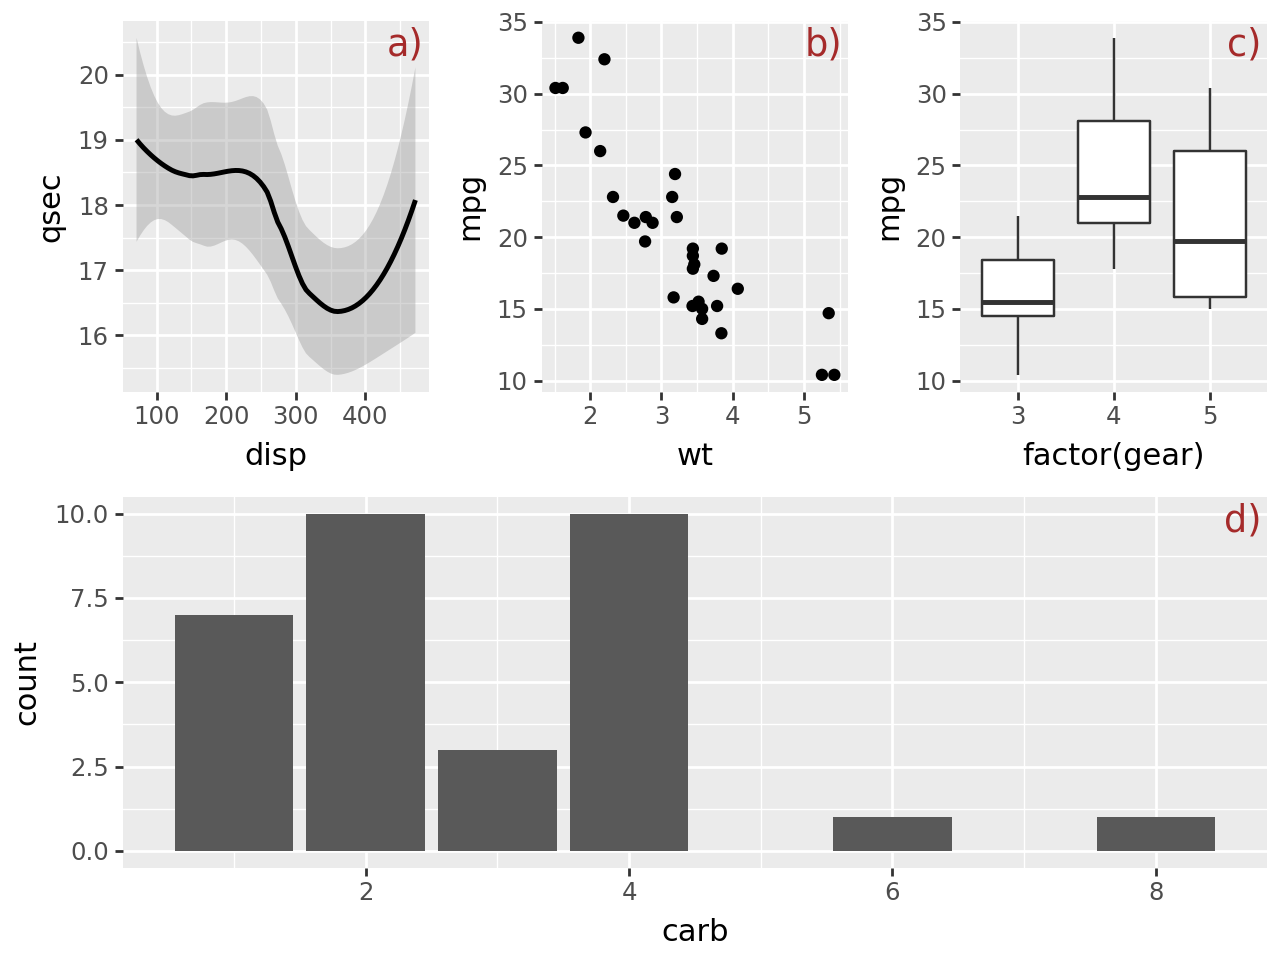

In [25]:
panel_top_right = theme(
    plot_tag_position="topright",
    plot_tag_location="panel",
    plot_tag=element_text(color="brown", margin={"t": 2, "r": 2})
)

p1_a = p1 + labs(tag="a)") + panel_top_right
p2_b = p2 + labs(tag="b)") + panel_top_right
p3_c = p3 + labs(tag="c)") + panel_top_right
p4_d = p4 + labs(tag="d)") + panel_top_right

(p1_a | p2_b | p3_c) / p4_d

The valid positions for tags are *topleft*, *top*, *topright*, *right*,
*bottomright*, *bottom*, *bottomleft*, *left* or a
*`tuple[float, float]`*.

## Save

Use the `save` method to save the composition as an image e.g.

``` python
composition.save("plot.png")
composition.save("plot.png", dpi=200)
composition.save("plot.jpg")
composition.save("plot.svg")
composition.save("plot.pdf")
```